# To-Dos


- [] Eda: melhorar
- [] Regressão Logística (fit predict, explicabilidade, metricas, variar thresholds)
- [] Partir o código/ explicar passo a passo
- [x] dar overfit de proposito
- [x] Grid Search (decision tree)
- [x] Varying decision threshold in random forest
- [x] precision (PPV) & recall (sensitivity) 


# Dataset: Pima Indians Diabetes Database

Data source and documentation [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download&select=diabetes.csv)

Data summary:
| **Column**                 | **Description**                                                        |
|----------------------------|------------------------------------------------------------------------|
| **Pregnancies**            | Number of times pregnant                                               |
| **Glucose**                | Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| **BloodPressure**          | Diastolic blood pressure (mm Hg)                                       |
| **SkinThickness**          | Triceps skin fold thickness (mm)                                       |
| **Insulin**                | 2-Hour serum insulin (mu U/ml)                                         |
| **BMI**                    | Body mass index (weight in kg/(height in m)^2)                         |
| **DiabetesPedigreeFunction** | Diabetes pedigree function                                           |
| **Age**                    | Age (years)                                                            |
| **Outcome**                | Class variable (0 or 1) 268 of 768 are 1, the others are 0             |



# Imports

In [26]:
# Imports
import pandas as pd
import numpy as np
from utils import preprocess_data
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

from utils import display_metrics

# **1. Load Data**

In [4]:
data_source = "diabetes.csv"
data_raw = pd.read_csv(data_source)
data = data_raw.copy()

data.head(3)
data.shape

(768, 9)

# EDA

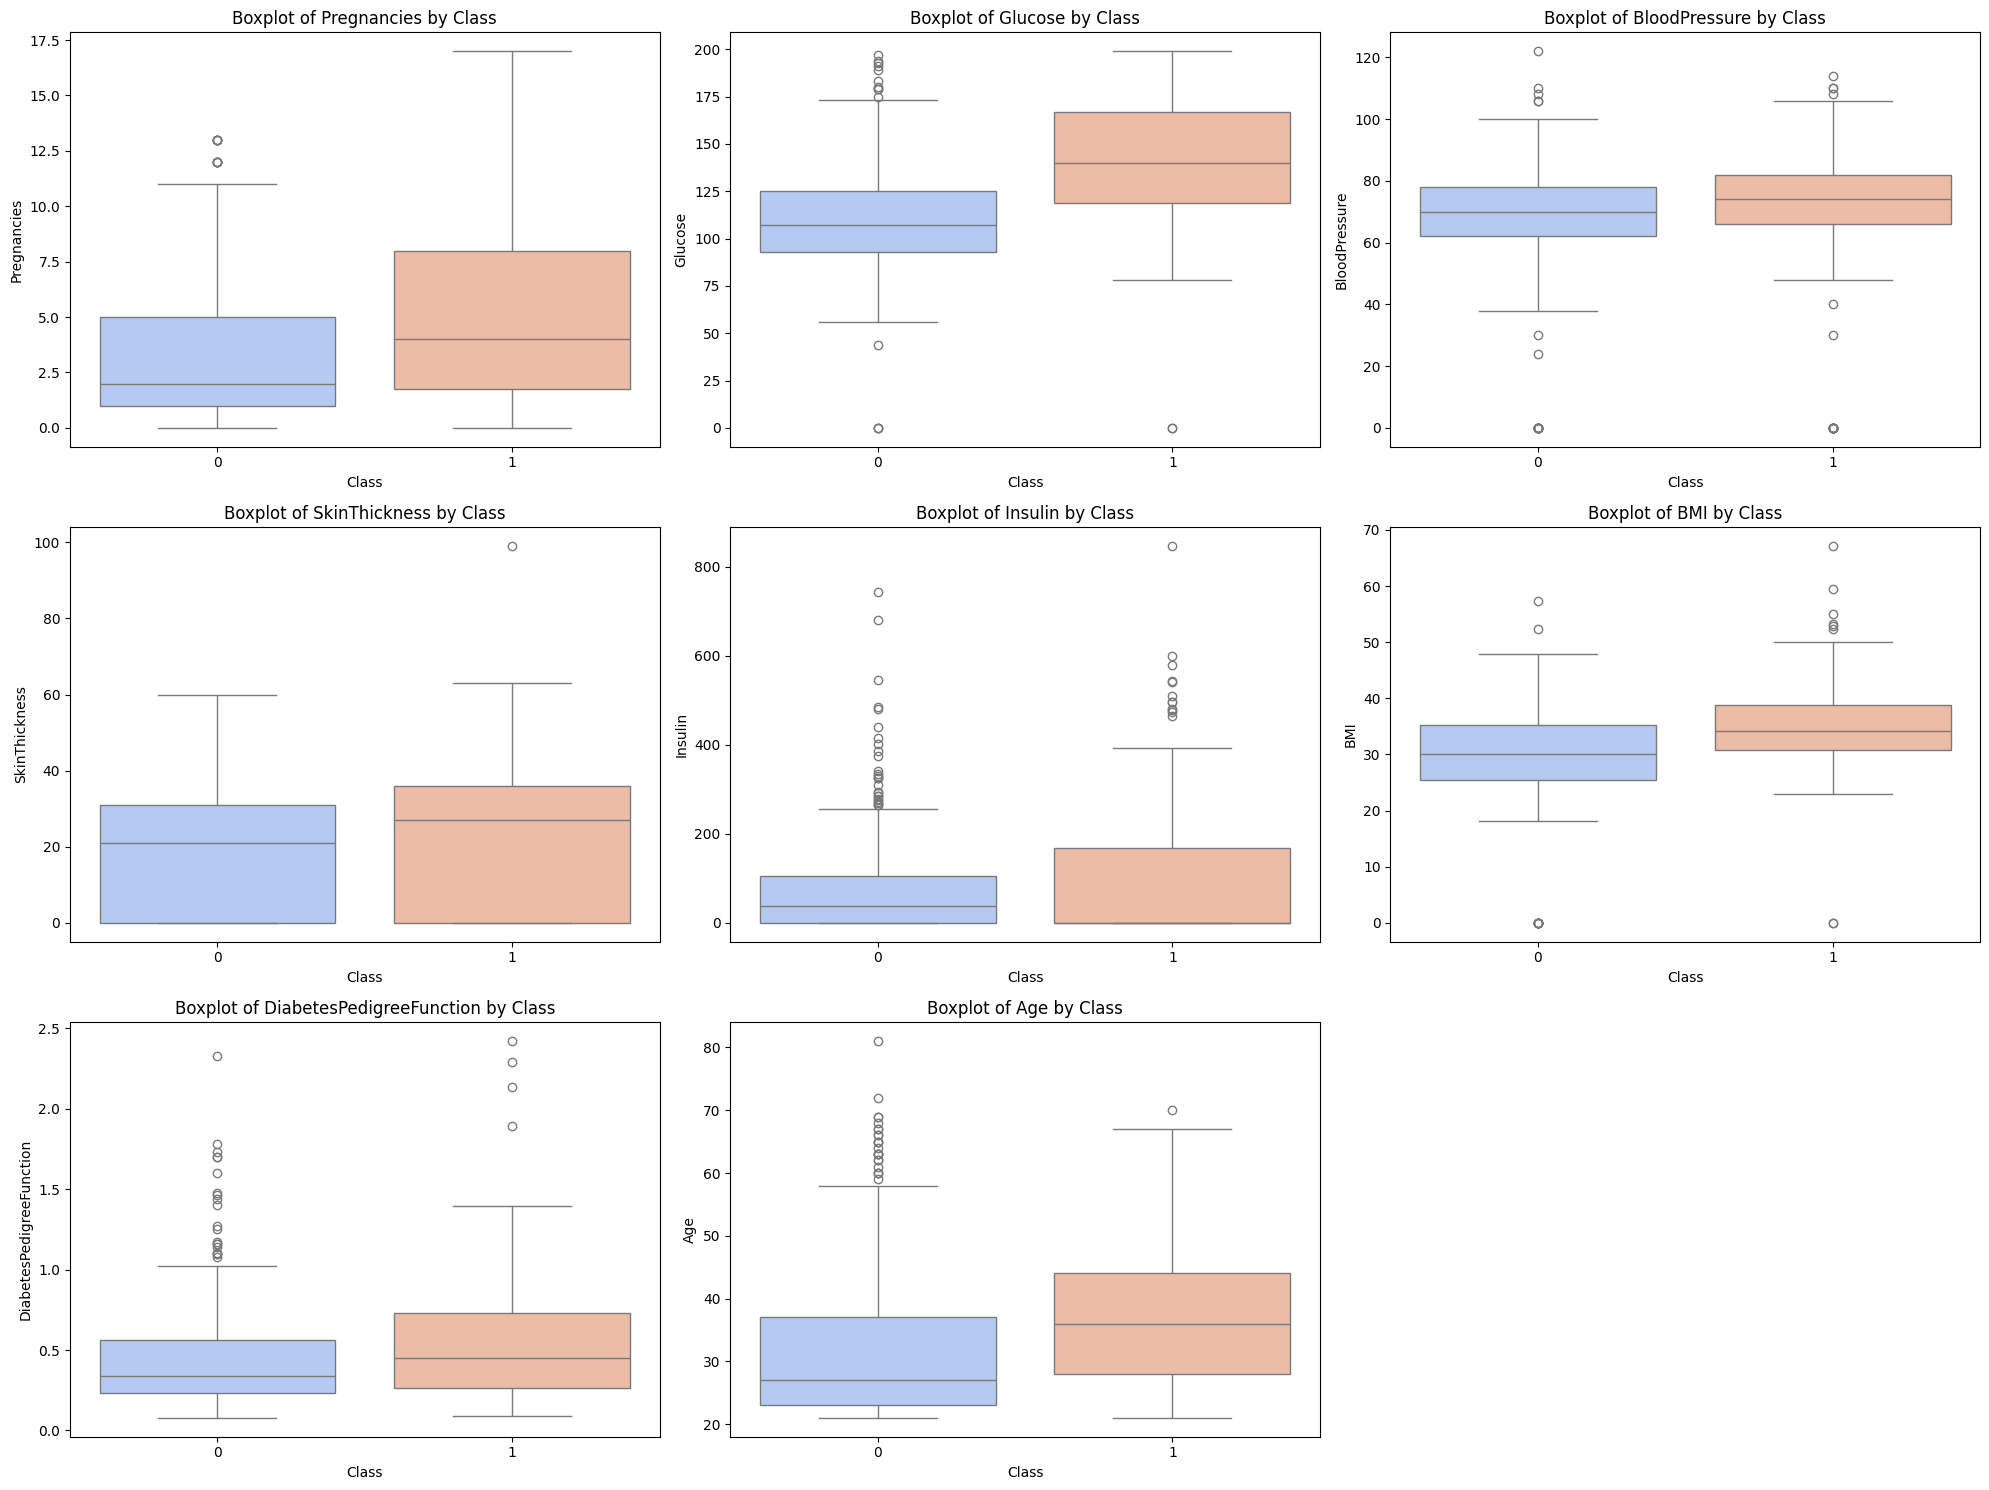

In [5]:
variables = data.drop(columns='Outcome').columns
plt.figure(figsize=(20, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=var, data=data, hue='Outcome', palette='coolwarm', legend=False)
    plt.title(f'Boxplot of {var} by Class')
    plt.xlabel('Class')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

# Metrics: Precision (PPV) and Recall (Sensitivity)

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Fed5e3e1c-1c01-4a43-8cec-7c53d81a1b4c_1858x1240.png)

# Model Generalization: Overfitting & cross-validation

Some machine learning models are very powerful, in the sense that they have the capability of learning complex patterns in data. That is the case for [RandomForests]()

In [6]:
# target column  is called "Class"
target_col = 'Outcome'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[target_col]), data[target_col], test_size=0.3, random_state=42)

In [7]:
# Define the model and hyperparameters
clf = RandomForestClassifier(random_state=42, 
                             n_estimators=1000,
                             max_depth=100, 
                             min_samples_split=2, 
                             min_samples_leaf = 1, 
                             max_features = 30,
                             min_impurity_decrease = 0.0,
                             ccp_alpha = 0.0,
                             bootstrap=False
                             )

In [9]:
# fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, max_features=30,
                       n_estimators=1000, random_state=42)

In [10]:
display_metrics(clf, X_train, y_train, X_test, y_test)

f1_score  recall  precision
Train metrics  1.000000  1.0000   1.000000
Test metrics   0.602273  0.6625   0.552083

This model is overfitting because it has much better performance in the data it was trained on than on unseen data. This means that it learned even the noise in the data - essentially it memorized how to perfectly predict the training data. By memorizing this data, it didn't learn the underlying processes/rules that actually define the correlation between the `features` and the `target`.

(meme - enter cross validation and grid search)

In to prevent overfitting, there are two things we can do:
1. Perform a `grid search` where we train multiple models and select only the best performing one on unseen data
2. Perform `cross validation` where our estimation of the model's generalization is more accurate

In [14]:
# create a dictionary to vary several hyperparameters of the Model
param_grid = {
    'n_estimators': [5, 10,20,40,60],
    'max_depth': [None, 2,5,10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 2,5,10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

In [16]:
# define how we want to perform the grid search
random_search = RandomizedSearchCV(clf, 
                                   random_state=42,
                                   param_distributions=param_grid,
                                   n_iter=100, 
                                   scoring='f1', 
                                   cv=5, 
                                   n_jobs=-1, 
                                   verbose=2)

input here image of cross validation

In [17]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END ccp_alpha=0.1, max_depth=None, max_features=None, min_impurity_decrease=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END ccp_alpha=0.1, max_depth=None, max_features=None, min_impurity_decrease=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END ccp_alpha=0.1, max_depth=None, max_features=None, min_impurity_decrease=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END ccp_alpha=0.1, max_depth=None, max_features=None, min_impurity_decrease=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END ccp_alpha=0.2, max_depth=5, max_features=10, min_impurity_decrease=0.0, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END ccp_alpha=0.1, max_depth=None, max_features=None, min_impurity_decrease=0.2, min_samples_leaf=2, min_samples_split=10, n_estimators=40; total time=   0.1s
[CV] END ccp_alpha=0.2

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=100,
                                                    max_features=30,
                                                    n_estimators=1000,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.1, 0.2],
                                        'max_depth': [None, 2, 5, 10, 20],
                                        'max_features': [None, 2, 5, 10],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 20, 40, 60]},
                   random_state=42, scoring='f1', verbose=2)

In [19]:
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score').head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
16       0.132533      0.032719         0.015768        0.006207   
49       0.197919      0.015609         0.012929        0.005097   
33       0.011763      0.000306         0.005243        0.000219   
50       0.120504      0.013261         0.009522        0.001727   
92       0.211827      0.036076         0.015925        0.013952   

    param_n_estimators  param_min_samples_split  param_min_samples_leaf  \
16                  40                        2                       4   
49                  60                       10                       2   
33                   5                        2                       2   
50                  40                        5                       4   
92                  60                        5                       2   

    param_min_impurity_decrease  param_max_features  param_max_depth  \
16                          0.0                 5.0              5.0   
49                          0.0                 NaN             20.0   
33                          0.0                 2.0             20.0   
50                          0.0                10.0             20.0   
92                          0.0                10.0              NaN   

    param_ccp_alpha                                             params  \
16              0.0  {'n_estimators': 40, 'min_samples_split': 2, '...   
49              0.0  {'n_estimators': 60, 'min_samples_split': 10, ...   
33              0.0  {'n_estimators': 5, 'min_samples_split': 2, 'm...   
50              0.0  {'n_estimators': 40, 'min_samples_split': 5, '...   
92              0.0  {'n_estimators': 60, 'min_samples_split': 5, '...   

    split0_test_score  split1_test_score  split2_test_score  \
16           0.695652           0.641026           0.729730   
49           0.608696           0.533333           0.739726   
33           0.720000           0.613333           0.606061   
50           0.657143           0.578947           0.704225   
92           0.626866           0.552632           0.666667   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
16           0.515152           0.591549         0.634622        0.076078   
49           0.611111           0.529412         0.604456        0.076224   
33           0.484848           0.575342         0.599917        0.075475   
50           0.563380           0.480000         0.596739        0.077794   
92           0.579710           0.507042         0.586583        0.055790   

    rank_test_score  
16                1  
49                2  
33                3  
50                4  
92                5

In [20]:
# show dataframe with all performances
best_model = random_search.best_estimator_

In [22]:
print('Metrics of overfitting model')
display(display_metrics(clf, X_train, y_train, X_test, y_test))

print('Metrics of best model from Grid Search')
display(display_metrics(best_model, X_train, y_train, X_test, y_test))

Metrics of overfitting model


f1_score  recall  precision
Train metrics  1.000000  1.0000   1.000000
Test metrics   0.602273  0.6625   0.552083

Metrics of best model from Grid Search


f1_score    recall  precision
Train metrics  0.839237  0.819149   0.860335
Test metrics   0.674699  0.700000   0.651163

Our new model improved it's f1_score by 7 percentual points!

# Decision Threshold

In reality most models produce a probability as prediction and we have to decide if we accept that probability as `class 1` or `class 0`. By default, anything above 0.5 is considered `class 1`, however, it is not always clear that it should be this way:

In [35]:
probas = best_model.predict_proba(X_train)[:,1]

# iterate the decision threshold between 0.1 and 0.9 and compute precision, recall and f1
# save results in a dictionary where the key is the threhsold and the value is a list of the metrics
thresholds = np.linspace(0.1, 0.9, 9)
metrics = {}
for threshold in thresholds:
    y_pred = (probas > threshold).astype(int)
    metrics[threshold] = [precision_score(y_train, y_pred), recall_score(y_train, y_pred), f1_score(y_train, y_pred)]

results = pd.DataFrame(metrics,index=['precision','recall','f1 score']).T.rename_axis(index='decision threshold')
results

precision    recall  f1 score
decision threshold                               
0.1                  0.531250  0.994681  0.692593
0.2                  0.620339  0.973404  0.757764
0.3                  0.658088  0.952128  0.778261
0.4                  0.702929  0.893617  0.786885
0.5                  0.860335  0.819149  0.839237
0.6                  0.939130  0.574468  0.712871
0.7                  0.963415  0.420213  0.585185
0.8                  1.000000  0.308511  0.471545
0.9                  1.000000  0.223404  0.365217

<Axes: title={'center': 'Metrics by Decision Threshold'}, xlabel='decision threshold'>

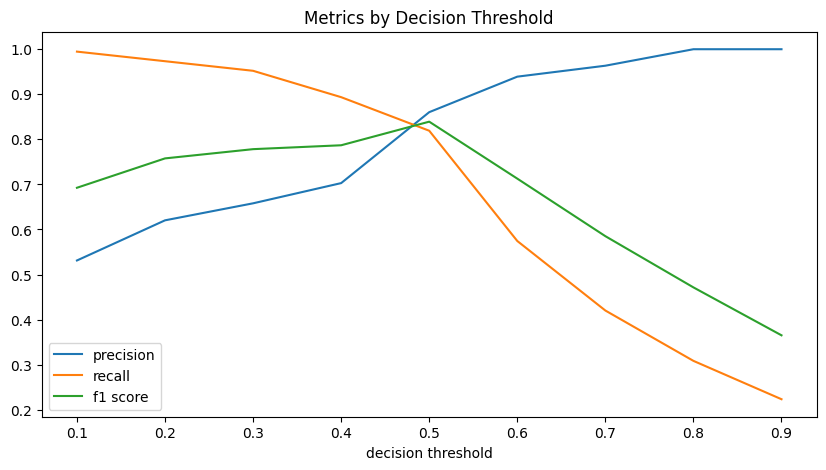

In [37]:
results.plot(title='Metrics by Decision Threshold', figsize=(10, 5))

### Rules of Thumb for Decision Threshold Adjustment in Healthcare

1. **Evaluate the Cost of Errors**:
   - Assess the clinical and psychological impact of false positives and false negatives for each specific test or model.
   - High cost of false positives (e.g., **invasive procedures**, **anxiety**) -> Higher precision.
   - High cost of false negatives (e.g., **missed diagnoses**, **delayed treatment**) -> Higher recall.

2. **Consider the Prevalence of the Condition**:
   - Rare conditions: High precision is often preferred due to the low base rate.
   - Common conditions: High recall is often preferred to catch as many cases as possible.

3. **Adjust for Context and Use Case**:
   - Screening vs. Diagnostic: Screening tests may prioritize recall to identify potential cases, while diagnostic tests may prioritize precision to confirm a diagnosis.
   - Preventive vs. Reactive: Preventive measures (e.g., vaccinations, regular screenings) may favor high recall, while reactive measures (e.g., treatment plans) may favor high precision.

### **4. Build Model**

In [8]:
# Using information from all columns (0-9) to predict target (column 10)
X = df.iloc[:, :9]
Y = df.iloc[:, 9]

# Splitting between traning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Checking the shapes to get an understanding of the problem

(559, 9) (140, 9)
(559,) (140,)


#### **4.1 Decision Trees**

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### **4.1.1 Decision Trees - Predictions**

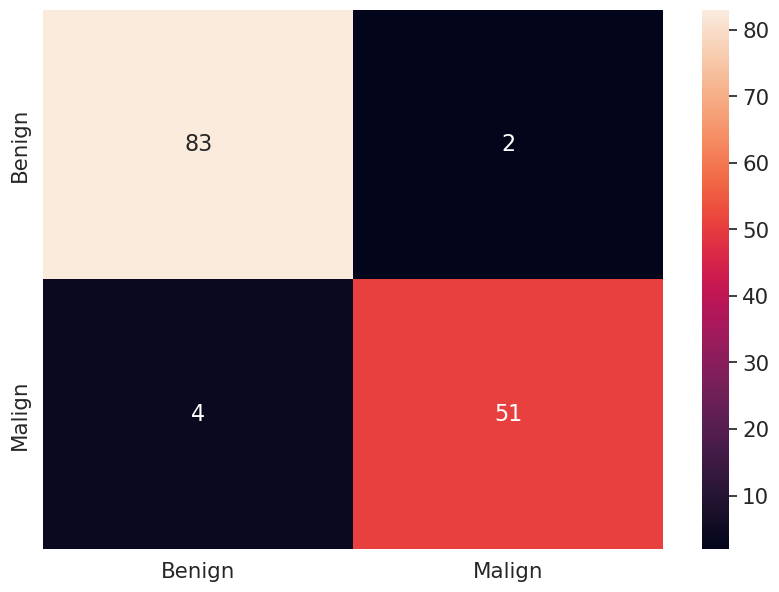

0.9571428571428572


In [10]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = dtree.predict(X_test)
print(Y_pred)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()

print(accuracy_score(Y_test, Y_pred))

#### **4.1.2 Decision Trees - Visualize Tree**

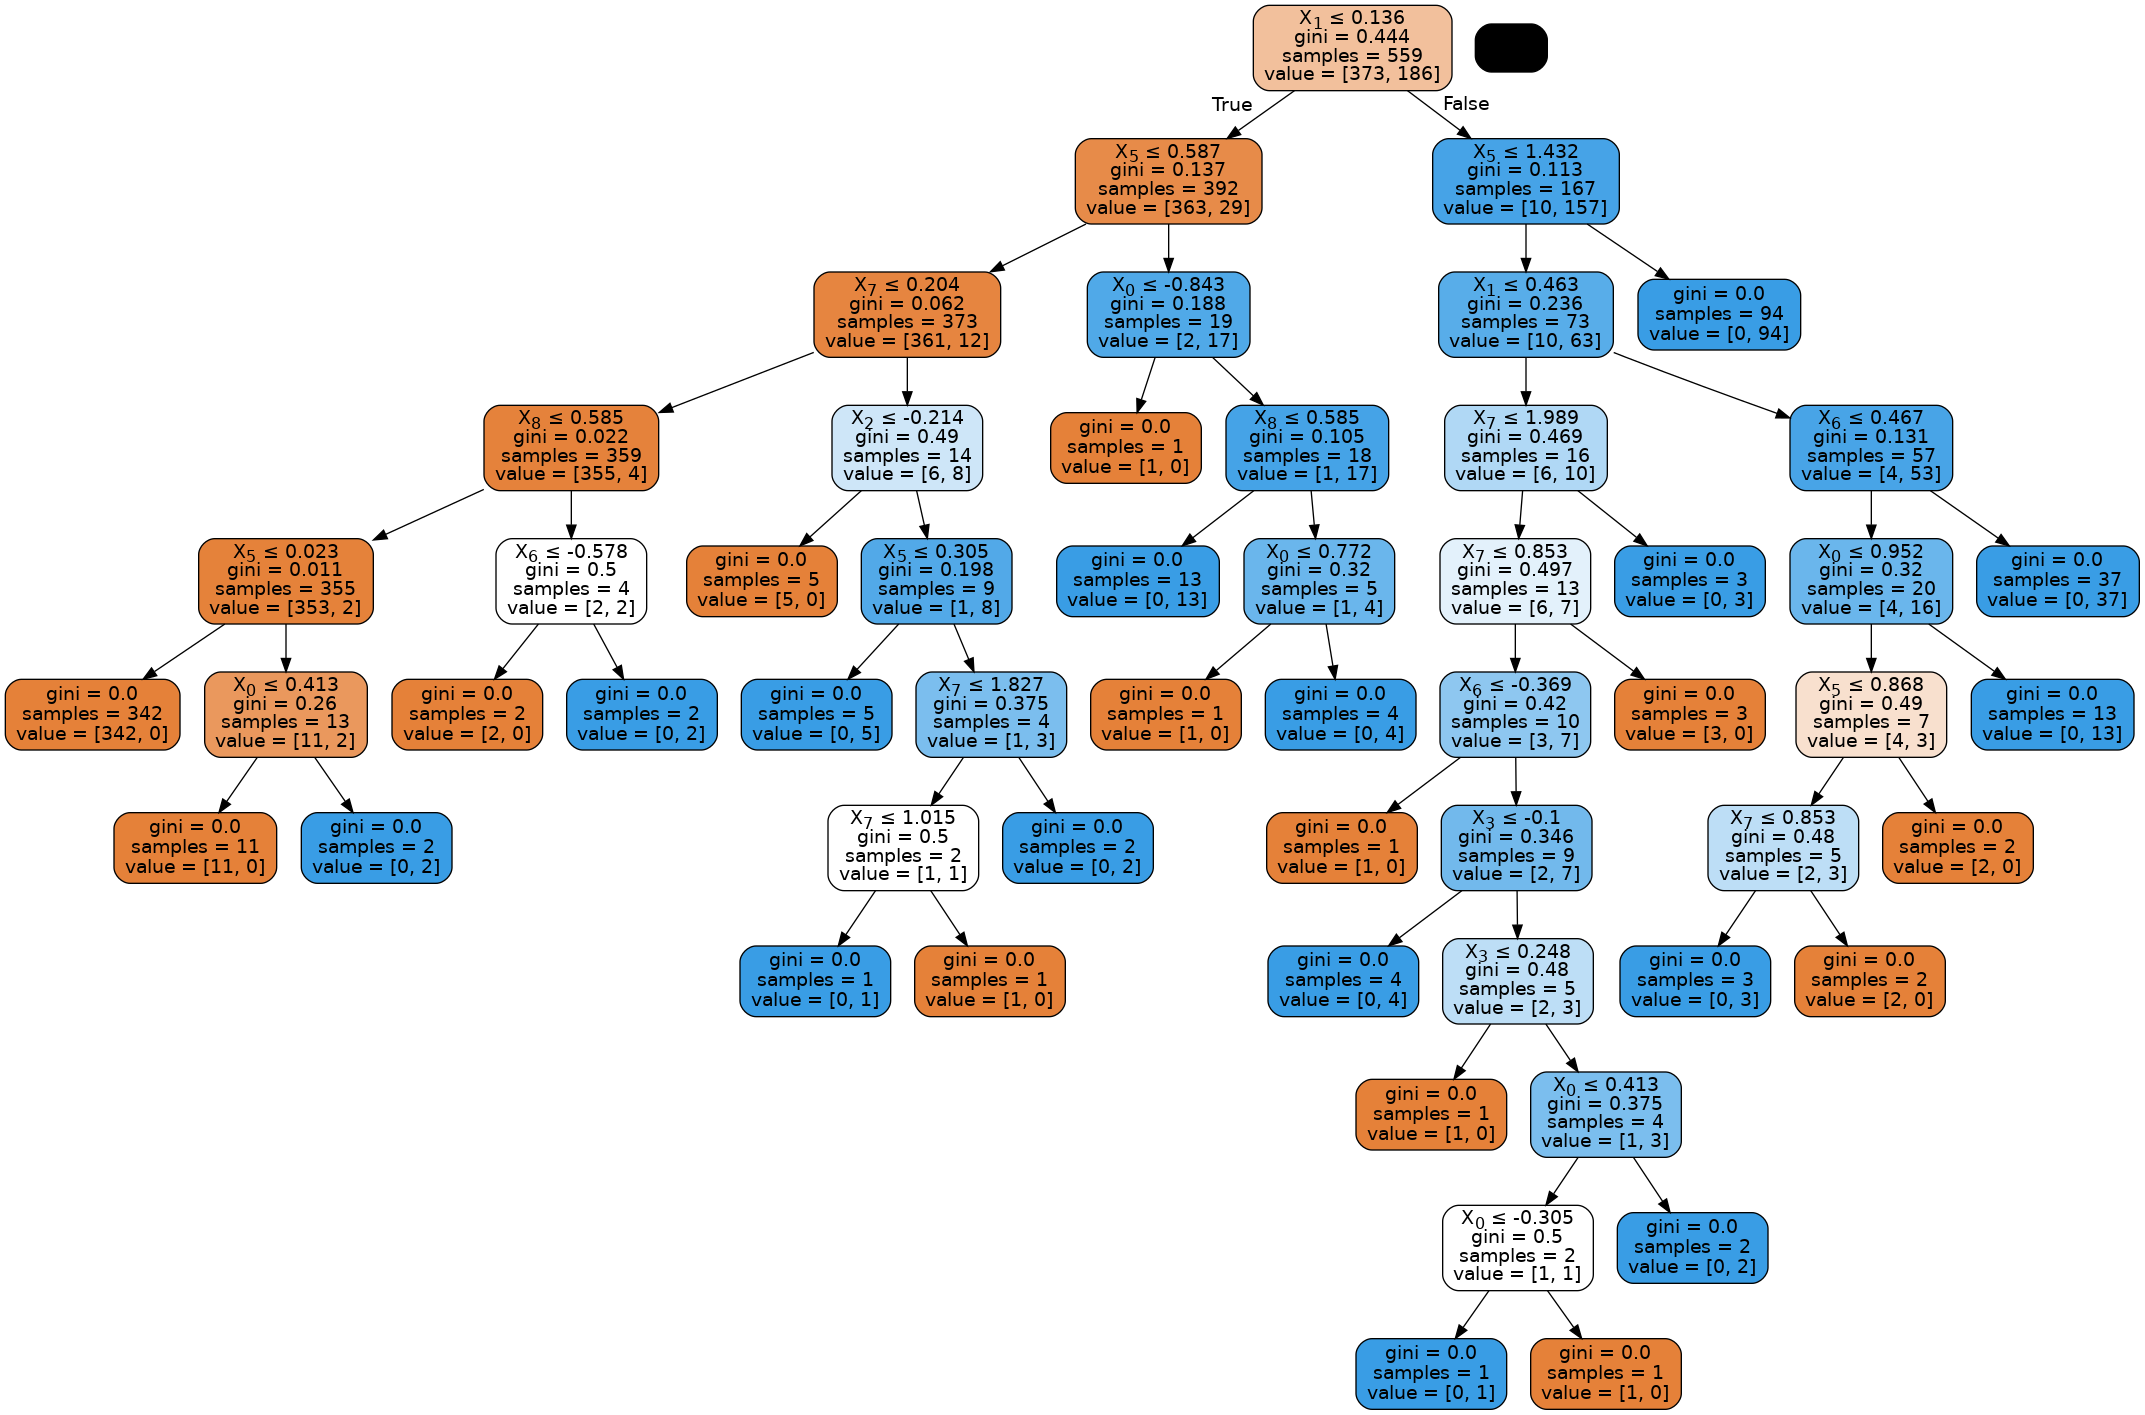

In [11]:
# Visualize Decision Tree
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### **4.1.3 Decision Trees - Explanation**

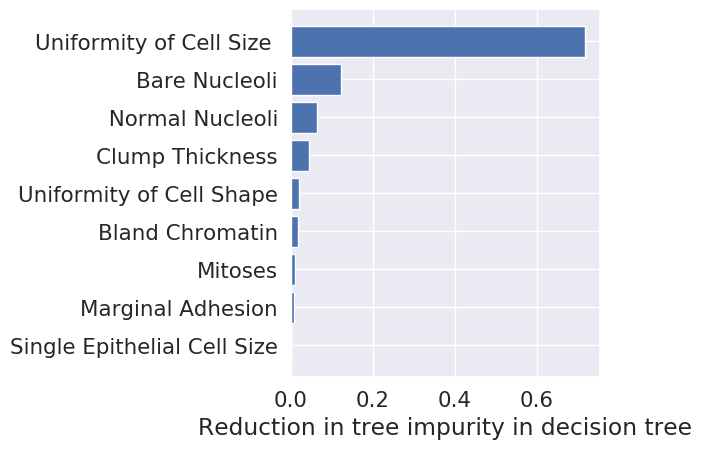

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                       'importance': dtree.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))


# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Reduction in tree impurity in decision tree")

plt.tight_layout()
# Show graphic
plt.show()



/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
2023-05-25 16:31:04.679840: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 16:31:06.063659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn

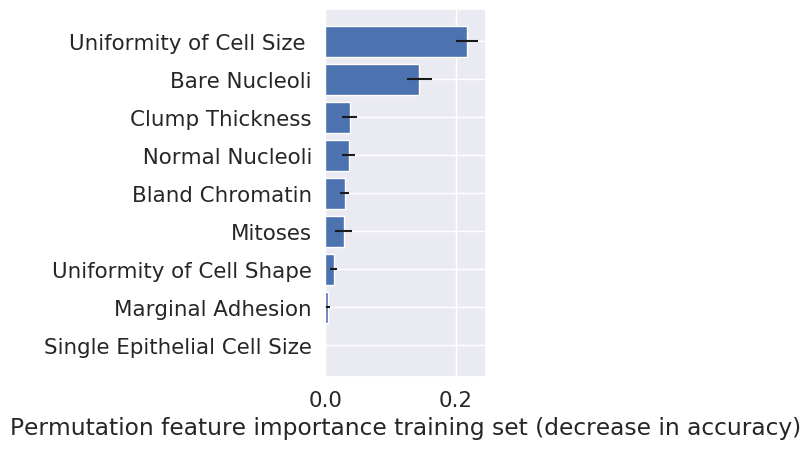

In [13]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics.scorer import make_scorer

import matplotlib.pyplot as plt
# Feature importance based on TRAINING set
#eli5 provides a way to compute feature importances for any black-box estimator by measuring how score decreases when a feature is not available
perm_test = PermutationImportance(dtree, scoring=make_scorer(accuracy_score),
                                   n_iter=50, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, Y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(9)], 'feature_name': ["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"]})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals

height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in accuracy)")
plt.tight_layout()

# Show graphic
plt.show()

Intercept 0.4587079403972345
Prediction_local [1.12430525]
Right: 1.0


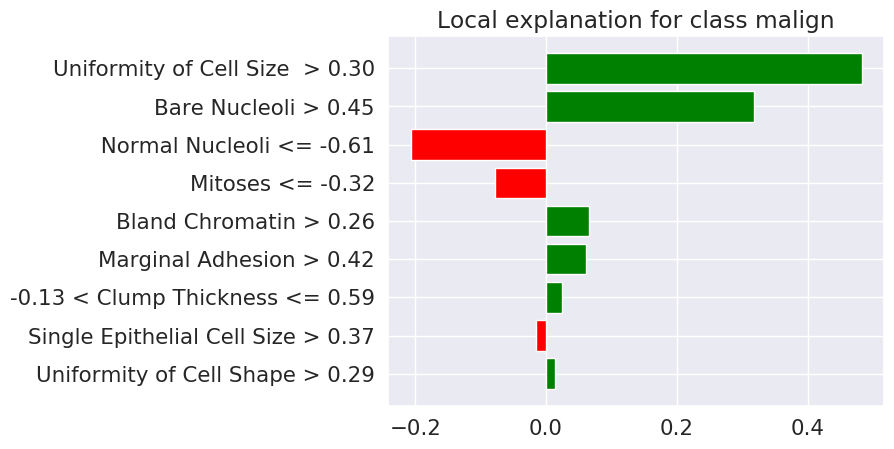

In [14]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain[21,:], dtree.predict_proba, 
                                 num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

#### **4.2 Multilayer Perceptron**

In [15]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from keras_tqdm import TQDMNotebookCallback

model = Sequential()
model.add(Dense(16, input_dim=(9), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

history= model.fit(X_train, Y_train,batch_size=16,validation_split=0.2, epochs=30,verbose=2)



2023-05-25 16:34:22.493299: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

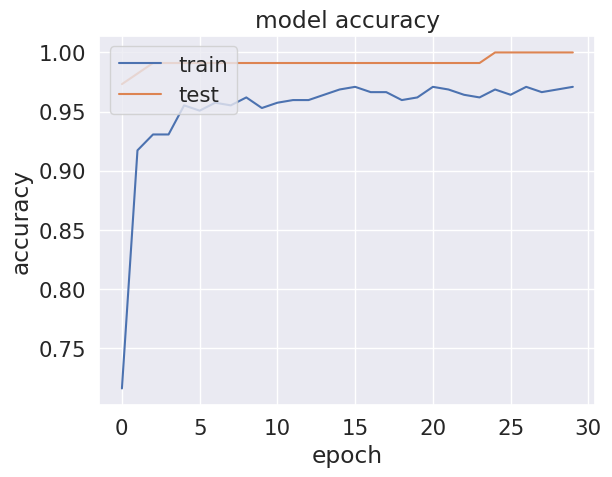

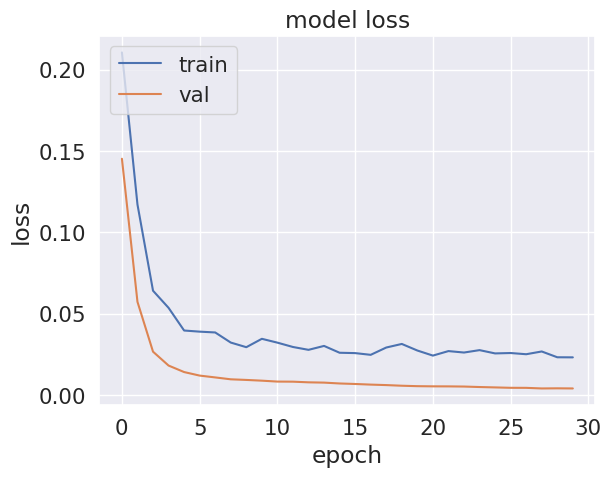

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### **4.2.1 Multilayer Perceptron - Predictions**

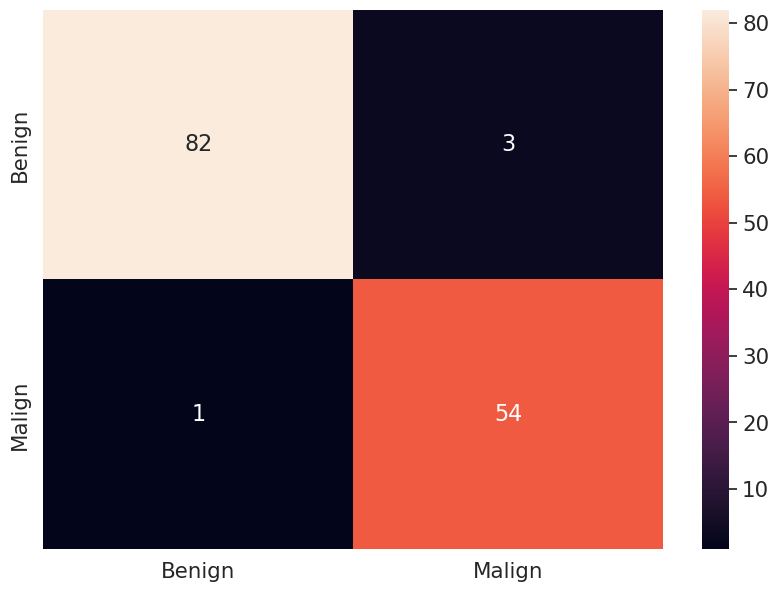

0.9714285714285714


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

Y_pred = model.predict(X_test,verbose=0)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
cm = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(cm, index = ["Benign", "Malign"],
                  columns = ["Benign", "Malign"])
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})
plt.show()
print(accuracy_score(Y_test, Y_pred))

#### **4.2.2 Multilayer Perceptron - Explanation**

(1, 9)
[[0.00028091]]
Intercept 0.5567550704966053
Prediction_local [1.45198567]
Right: 0.9990845918655396


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:429: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


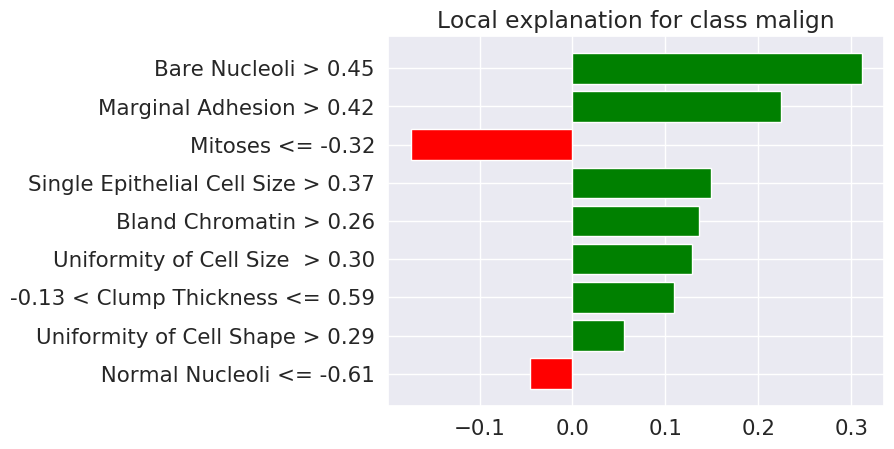

In [18]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np

def predict(qc):
    global model
    prediction_Class_1 = model.predict_proba(qc) 
    x = np.zeros((prediction_Class_1.shape[0], 1))
    probability = (x + 1) - prediction_Class_1
    final = np.append(probability,prediction_Class_1, axis=1)
    return final

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train,
                                                   feature_names=["Clump Thickness","Uniformity of Cell Size ","Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nucleoli", "Bland Chromatin"," Normal Nucleoli", "Mitoses"],
                                                   discretize_continuous=True,
                                                   class_names=["benign", "malign"],
                                                   mode="classification",
                                                   verbose=True)
print(np.array([X_test[0,:]]).shape)
print(model.predict_proba(np.array([X_test[0,:]])))

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_test[21,:], predict,num_features=10)
#Plot local explanation
plt = exp.as_pyplot_figure()
#plt.tight_layout()
exp.show_in_notebook(show_table=True)

## THE END 